# Treinamento de um autoencoder

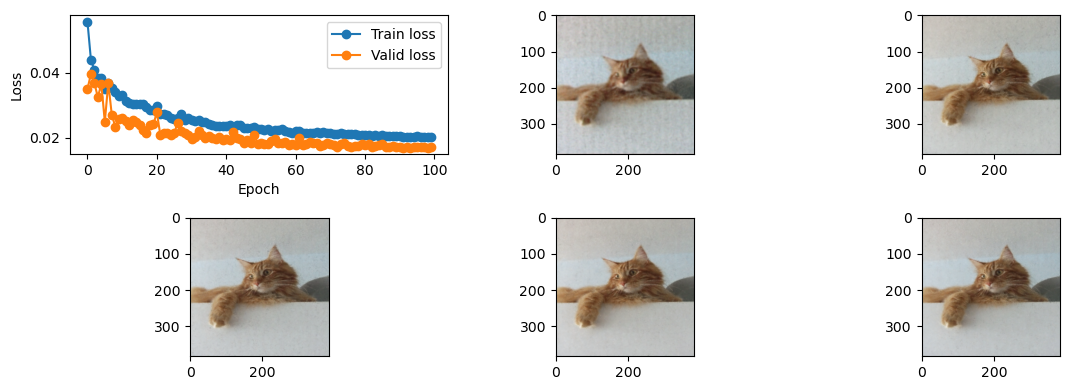

In [1]:
from torch import nn
from torchvision.models import resnet18, ResNet18_Weights
import train

import sys
sys.path.insert(0, '../')
from M07_segmentacao.models import EncoderDecoder

params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':100,
    'lr':0.1,
    'weight_decay':0,
    'resize_size':384,  
    'seed':0
}

encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=3)
# Adiciona camada sigmoide ao final pois a saída da rede deve estar em um intervalo
# delimitado. Afinal, imagens possuem intensidades em um intervalo delimitado.
model.classification = nn.Sequential(model.classification, nn.Sigmoid())
ds_train, ds_valid, logger = train.train(model, **params)

In [3]:
logger[-1][:-1]

(99, 0.02035691775381565, 0.017196903005242348, 0.0)